# DEFINING THE QUESTION


### a) Objectives
Main Objective : Understanding Electric Bluecar Car usage

Speecific Objectives:

i) Determine the number of blueCars taken and returned over the weekend at the postal code 94130 ii) Determine the relationship of various variables to blueCars(Chi-Square(between Numeric variables) and Z-test statistics(categorical and Numeric variables)) iii) Determine the probability of bluecar usage over the weekend(Probability of bluecars being taken or returned during a single)

### b) Metrics For Success
i) Use an appropriate sampling Technique ii) Use an appropriate distribution in obtaining probability in hypothesis testing

### c) Context
Electrical vehicles are becoming increasingly common today and because of this trends, it is important to have an indepth statistical understanding of this trend. Because of this, we can aim to understand the particular details so as to improve the quality and attract more customers, hence the need for this study

### d) Experimental Designs
i) Data Exploration Importing Libraries Loading Dataset Cleaning Data Determine Relationship between variables(Univariate, Multivariate)

ii) Sampling Distribution

iii) Statistical Inferences Hypothesis Testing

iv) Estimation Probability Distribution(Poisson Distribution)

# Appropriateness of Data

In [0]:
### Importing necessary libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [3]:

## Loading dataset

car_ds = pd.read_csv('http://bit.ly/DSCoreAutolibDataset')

## Viewing the first 5 rows of our dataset

car_ds.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [4]:
car_ds.shape


(16085, 13)

In [6]:
## Loading data dictionary

dictionary = pd.read_excel('/content/columns_explanation.xlsx')

## Viewing the dataset

dictionary

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


Above,information of what the columns of our dataset represents




# Tidying up dataset

**Renaming** **columns**


In [0]:
## Changing columns to lower case and replacing empty spaces with underscore columns
car_ds.columns = cars.columns.str.lower().str.replace(" ",'_')

In [11]:
car_ds.columns


Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

All empty spaces between column names have been replaced with an underscore



In [0]:

car_ds.rename(columns = {'n_daily_data_points': 'daily_data_poits','dayofweek':'day_of_the_week'},inplace = True)

In [13]:
### Creating a copy of the original dataset that we will work on without altering the original dataset

car = car_ds.copy()

## Viewing the copy of the dataset
car.head(6)

,postal_code,date,daily_data_poits,day_of_the_week,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
5,75001,1/6/2018,1437,5,weekend,187,185,6,6,7,8,38,35


we can use the copy of the real dataset to make our analysis and then we can make comparison in the end if need be

In [15]:

### Checking for the number of rows and columns of the data

car.shape

(16085, 13)

**Checking** **for** **null** **values**

In [16]:
car.isnull().sum()

postal_code               0
date                      0
daily_data_poits          0
day_of_the_week           0
day_type                  0
bluecars_taken_sum        0
bluecars_returned_sum     0
utilib_taken_sum          0
utilib_returned_sum       0
utilib_14_taken_sum       0
utilib_14_returned_sum    0
slots_freed_sum           0
slots_taken_sum           0
dtype: int64

There are no null values in the dataset

**Checking unique values in each column**

In [17]:
### poastal code column

car.postal_code.unique()

array([75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009,
       75010, 75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018,
       75019, 75020, 75112, 75116, 78000, 78140, 78150, 91330, 91370,
       91400, 92000, 92100, 92110, 92120, 92130, 92140, 92150, 92160,
       92170, 92190, 92200, 92210, 92220, 92230, 92240, 92250, 92260,
       92270, 92290, 92300, 92310, 92320, 92330, 92340, 92350, 92360,
       92370, 92380, 92390, 92400, 92410, 92420, 92500, 92600, 92700,
       92800, 93100, 93110, 93130, 93150, 93170, 93200, 93230, 93260,
       93300, 93310, 93350, 93360, 93370, 93390, 93400, 93440, 93500,
       93600, 93700, 93800, 94000, 94100, 94110, 94120, 94130, 94140,
       94150, 94160, 94220, 94230, 94300, 94340, 94410, 94450, 94500,
       94700, 94800, 95100, 95870, 95880])

In [19]:
car.day_of_the_week.unique()

array([0, 1, 2, 3, 4, 5, 6])

In [20]:

car.day_type.unique()

array(['weekday', 'weekend'], dtype=object)

In [21]:
car.date.unique()

array(['1/1/2018', '1/2/2018', '1/3/2018', '1/4/2018', '1/5/2018',
       '1/6/2018', '1/7/2018', '1/8/2018', '1/9/2018', '1/10/2018',
       '1/11/2018', '1/12/2018', '1/13/2018', '1/14/2018', '1/15/2018',
       '1/16/2018', '1/17/2018', '1/18/2018', '1/19/2018', '1/20/2018',
       '1/21/2018', '1/22/2018', '1/23/2018', '1/24/2018', '1/25/2018',
       '1/26/2018', '1/27/2018', '1/28/2018', '1/29/2018', '1/30/2018',
       '1/31/2018', '2/1/2018', '2/2/2018', '2/3/2018', '2/4/2018',
       '2/5/2018', '2/6/2018', '2/7/2018', '2/8/2018', '2/9/2018',
       '2/10/2018', '2/11/2018', '2/12/2018', '2/13/2018', '2/14/2018',
       '2/15/2018', '2/16/2018', '2/17/2018', '2/18/2018', '2/19/2018',
       '2/20/2018', '2/21/2018', '2/22/2018', '2/23/2018', '2/24/2018',
       '2/28/2018', '3/1/2018', '3/2/2018', '3/3/2018', '3/4/2018',
       '3/5/2018', '3/6/2018', '3/7/2018', '3/8/2018', '3/9/2018',
       '3/10/2018', '3/11/2018', '3/12/2018', '3/13/2018', '3/14/2018',
       '3/15/2018',

In [22]:
car.shape

(16085, 13)


our dataset contains 16085 rows and 13 columns

this shows that each date was unique meanining no date was repeated because the rows size of the whole dataset and the unique date column are exactly the same


**Checking** **Outliers**


Using Boxplots on Numerical variables

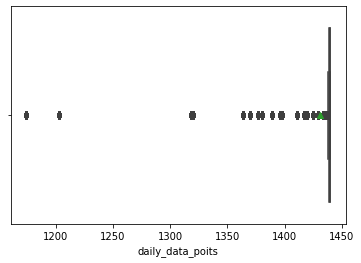

In [24]:
## Checking for outliers in the numerical data
# Using boxplots and Histogram
sns.boxplot(car['daily_data_poits'],showmeans = True)

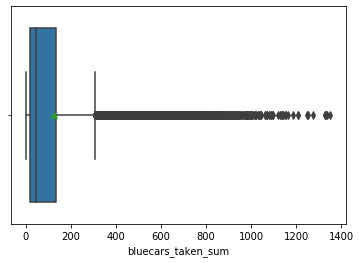

In [25]:

## Checking for outliers in the numerical data
# Using boxplots and Histogram
sns.boxplot(car['bluecars_taken_sum'],showmeans = True)

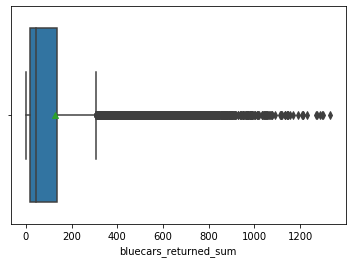

In [27]:

## Checking for outliers in the numerical data
# Using boxplots and Histogram
sns.boxplot(car['bluecars_returned_sum'],showmeans = True)

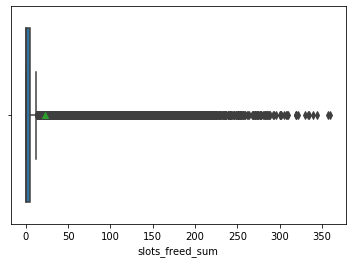

In [28]:

## Checking for outliers in the numerical data
# Using boxplots and Histogram
sns.boxplot(car['slots_freed_sum'],showmeans = True)

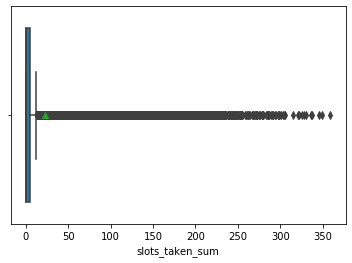

In [29]:
## Checking for outliers in the numerical data
# Using boxplots and Histogram
sns.boxplot(cars['slots_taken_sum'],showmeans = True)


All the boxplots above shos presence of outliers

In [30]:
##

import pandas_profiling as pr ## A library thst shows info about the dataset

pr.ProfileReport(car)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,13
Number of observations,16085
Total Missing (%),0.0%
Total size in memory,1.6 MiB
Average record size in memory,104.0 B
Numeric,5
Categorical,2
Boolean,0
Date,0
Text (Unique),0
Rejected,6


# ANALYSIS

## Univariate Analysis

### 1) Categorical variables

Frequency Tables

In [31]:
## creating a freuency table to give us a summary of the information in each column

car.postal_code.value_counts()

94130    156
92310    156
78140    156
94700    156
95100    156
        ... 
93150    151
93370    149
92340    147
93200    126
93390     84
Name: postal_code, Length: 104, dtype: int64

The above indicates that the postal code with the least activity is 93390 with 84 cars and postal codes with 156 counts of cars have the most activity

In [33]:

### creating a freuency table to give us a summary of the information in each column


car.date.value_counts()

2/23/2018    104
6/11/2018    104
5/5/2018     104
5/29/2018    104
6/5/2018     104
            ... 
3/29/2018    102
1/5/2018     102
3/14/2018    101
2/24/2018     98
6/19/2018     94
Name: date, Length: 156, dtype: int64

2) Numerical Variables

Measure of Central tendency and Summary statistics

In [0]:
## Changing the datatype of postal code to categorical variable to keep it from the measures of centyral tendenct and variability


car.day_of_the_week = car.day_of_the_week.astype('object')
car.postal_code = car.postal_code.astype('object')

In [36]:
car.dtypes

postal_code               object
date                      object
daily_data_poits           int64
day_of_the_week           object
day_type                  object
bluecars_taken_sum         int64
bluecars_returned_sum      int64
utilib_taken_sum           int64
utilib_returned_sum        int64
utilib_14_taken_sum        int64
utilib_14_returned_sum     int64
slots_freed_sum            int64
slots_taken_sum            int64
dtype: object


The postal_code varible and day_of_week has been changed from numerical variable to categorical variable

In [37]:
## Obtaining the statistical summary of each column of the dataframe

car.describe()

,daily_data_poits,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,1431.330619,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,33.212050,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1439.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,1440.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,1440.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,1440.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000



The table above gives the statistical description (counts, mean, std, min, max, lower,upper and interquartile Range) of columns having numerical variables

## Measure of symmetry(skewness) and Kurtosis

In [38]:

## Measure of symmetry

car.skew()

postal_code              -1.168778
daily_data_poits         -5.742776
day_of_the_week           0.018824
bluecars_taken_sum        2.406355
bluecars_returned_sum     2.412085
utilib_taken_sum          2.556872
utilib_returned_sum       2.578665
utilib_14_taken_sum       2.510924
utilib_14_returned_sum    2.511488
slots_freed_sum           2.597406
slots_taken_sum           2.596904
dtype: float64

From the information above, all variables having a positive skewness shows a positive skewness meaning that their mean is greater than mode and that these dataset have a longer tail to the right.

In [39]:
## Kurtosis
## Test of whether a data is heavily tailed(presence of outliers) or lightly tailed(lack of outliers) relative to normal distrtibution

car.kurt()

postal_code               -0.542143
daily_data_poits          36.594846
day_of_the_week           -1.260994
bluecars_taken_sum         6.172692
bluecars_returned_sum      6.186288
utilib_taken_sum           7.702362
utilib_returned_sum        7.936357
utilib_14_taken_sum        7.186815
utilib_14_returned_sum     7.185463
slots_freed_sum            6.454514
slots_taken_sum            6.442553
dtype: float64

From the information above, all the data with a values greater than 0 shows that tails are thick and heavy meaning they have outlier whereas variables with values less than 0 shows that tails are thin meaning they have few outliers

# Bivariate Analysis

This is a test of relationship between variables

In [40]:
car.head()

,postal_code,date,daily_data_poits,day_of_the_week,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [41]:
## Checking datatypes in the dataset

car.dtypes

postal_code               object
date                      object
daily_data_poits           int64
day_of_the_week           object
day_type                  object
bluecars_taken_sum         int64
bluecars_returned_sum      int64
utilib_taken_sum           int64
utilib_returned_sum        int64
utilib_14_taken_sum        int64
utilib_14_returned_sum     int64
slots_freed_sum            int64
slots_taken_sum            int64
dtype: object


All columns values are integers except postal_code,date and date_type which are all categorical variables

### 1) Numerical Values

<function matplotlib.pyplot.show>

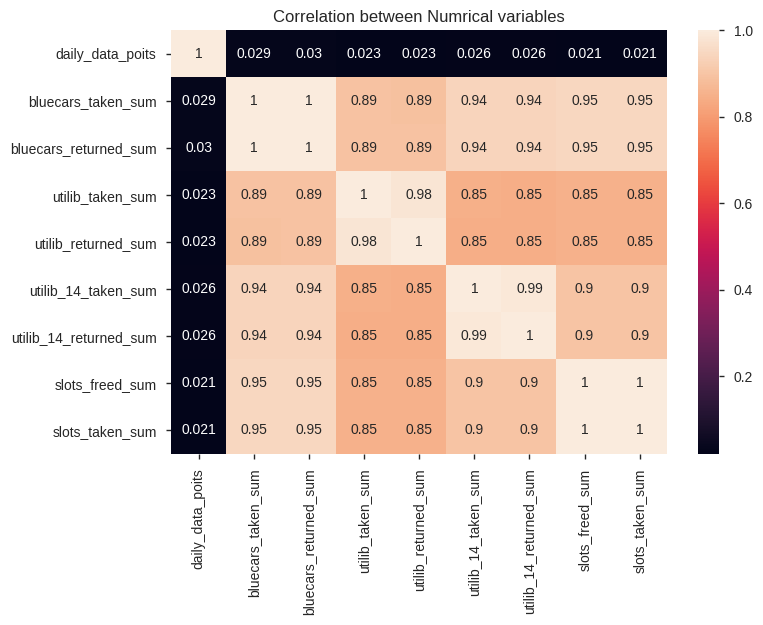

In [42]:
## Numerical values in this dataset are  all the variables with integer values which includes all the columns with the exception of postal_code,date and day_type

## Determining whether or not there is relationship between variables using Persons correlation 

plt.figure(dpi=100)
p_cor = car.corr()
sns.heatmap(p_cor, xticklabels=p_cor.columns, yticklabels=p_cor.columns, annot = True)
plt.title('Correlation between Numrical variables')
plt.show

Values close to 1 shows for a strong correlation and from the table above, most variables are correlated as they have values close to one

<Figure size 1000x1000 with 0 Axes>

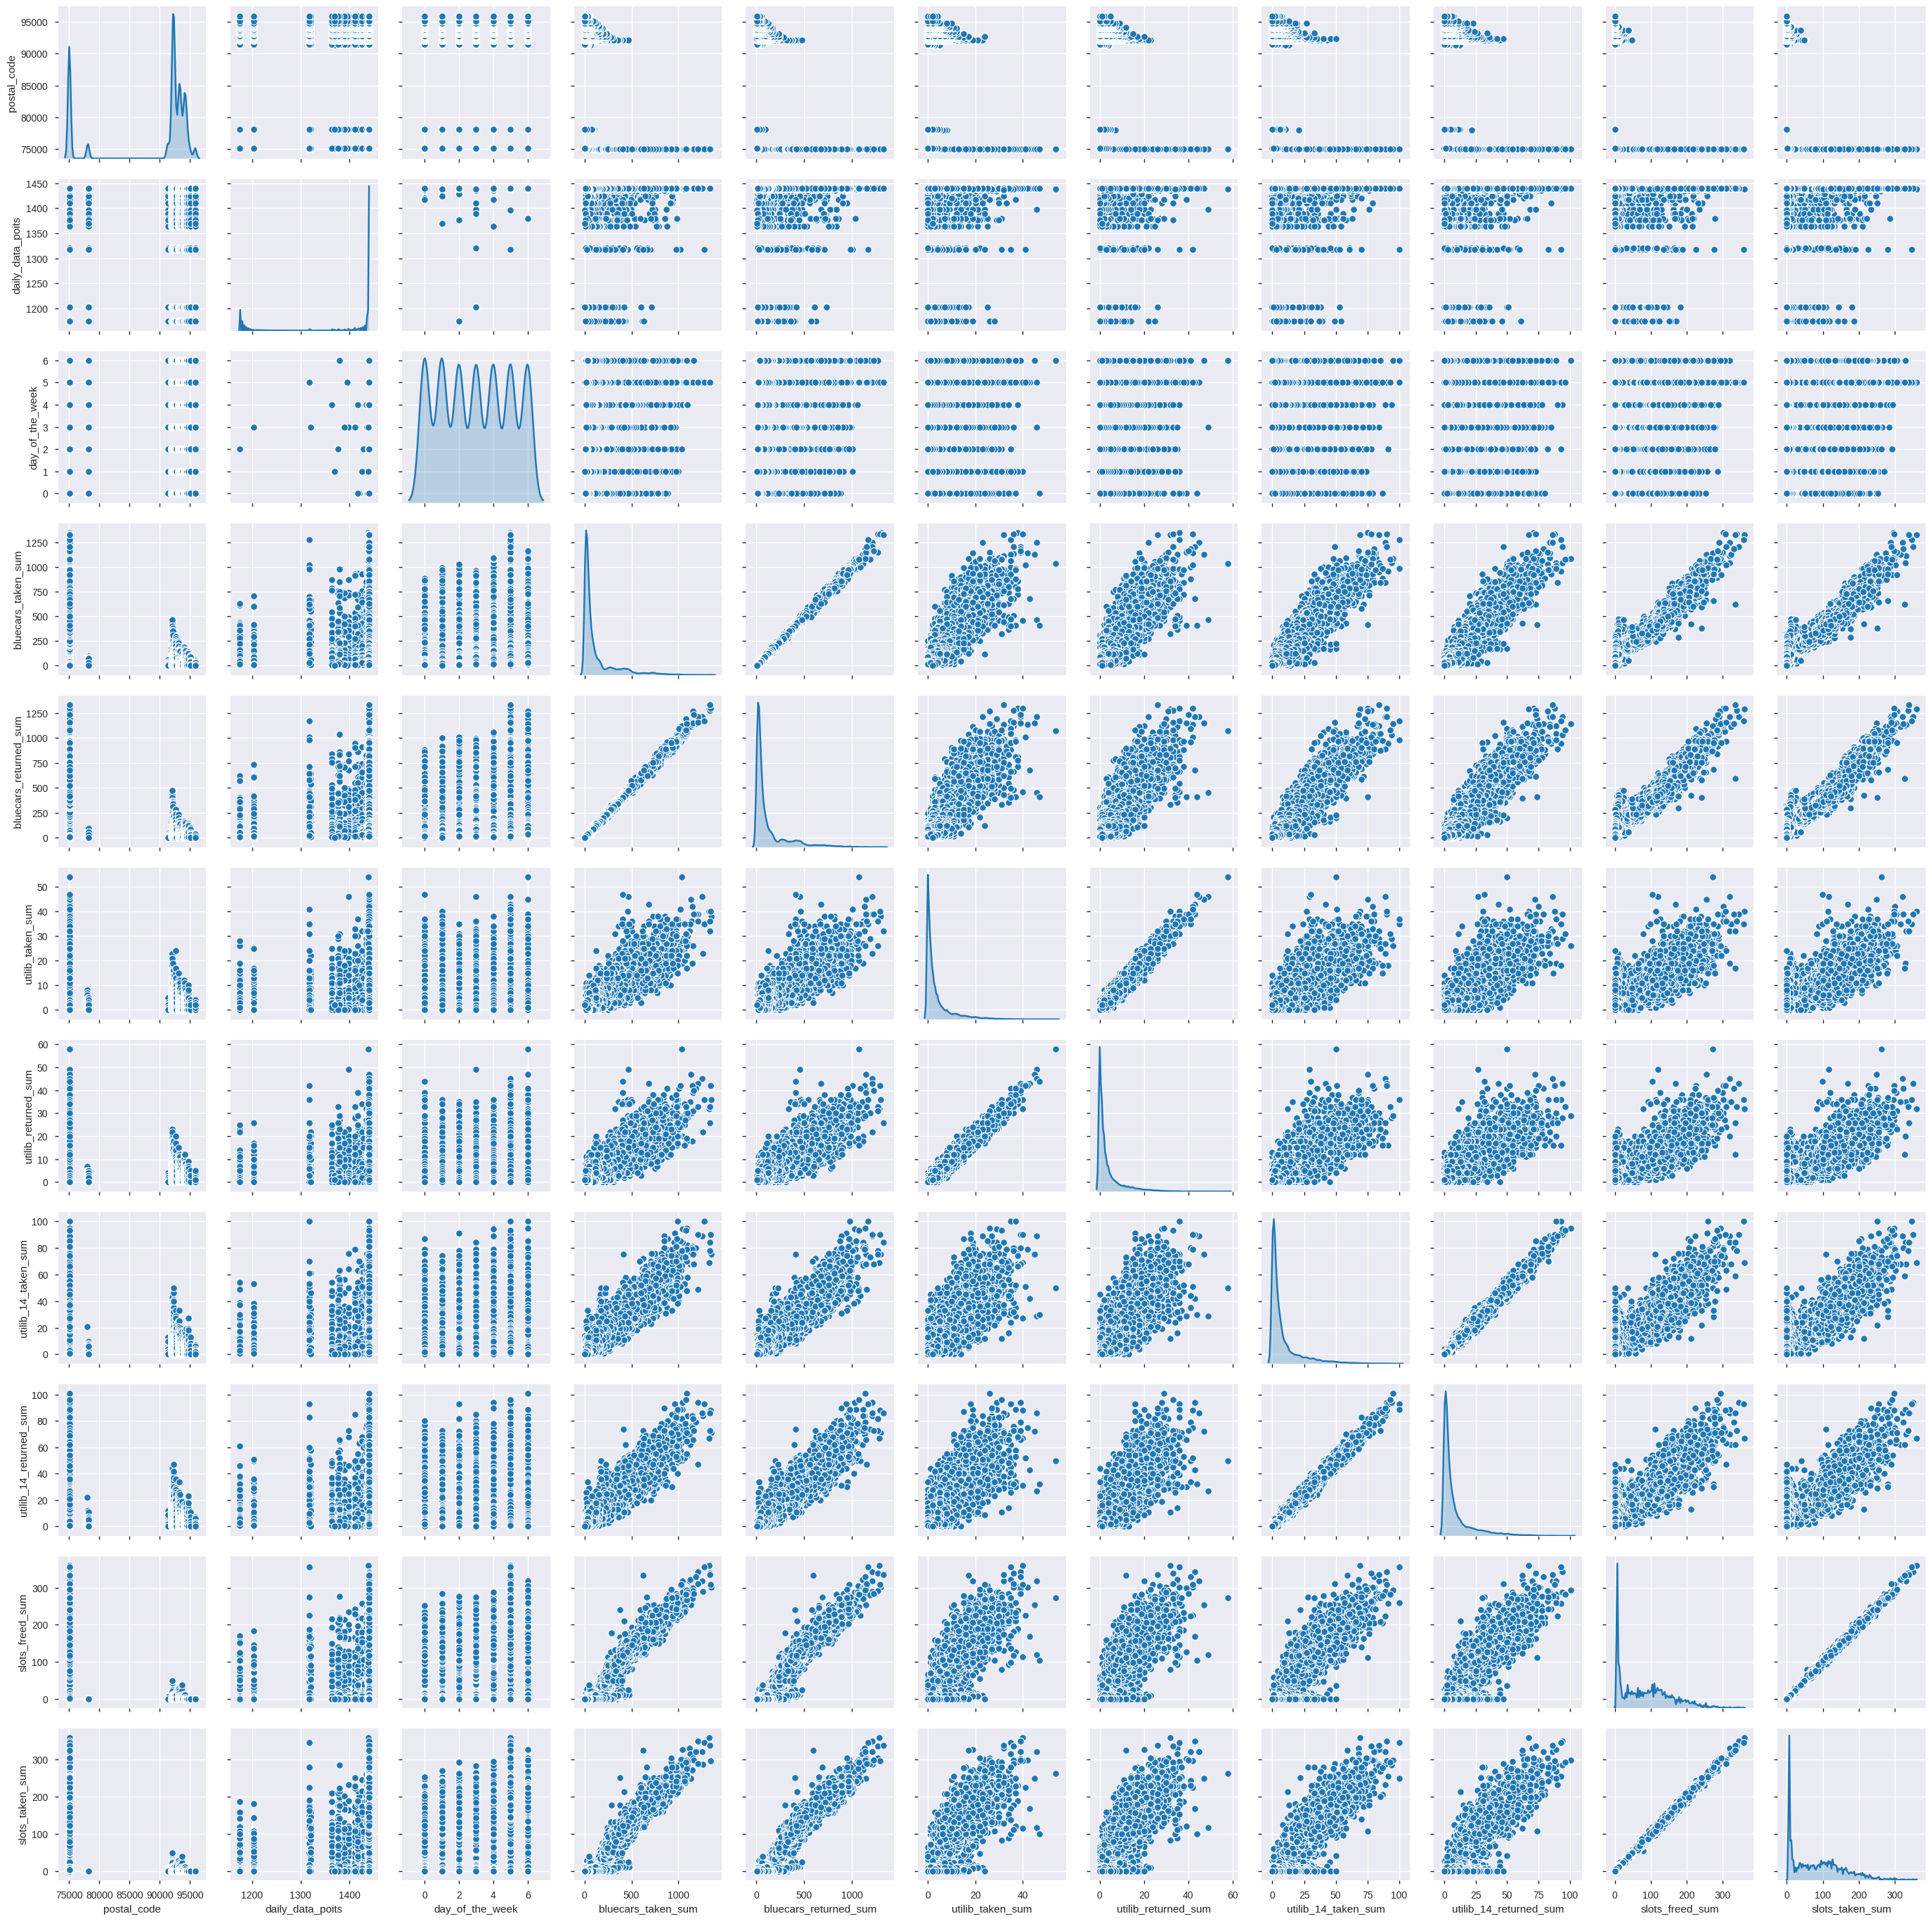

In [43]:

## Using persons correlation coeffocient to test for correlation between variables

## Correlation of columns on the dataframe
plt.figure(figsize=(10, 10))
sns.pairplot(car, diag_kind='kde');


This is a graphical representation of all variables(both the x and y axis)of all the collumns whereby scatter plots that is arranged in a linear way shows high correlation between the two variables

### 2) Numerical and Categorical values

**Z-test Statistics**

( We use the z statistics becauseb the events/dataset has more than 30 vales and z test is a statistical test that measiures the relationship between categorical and numerical variables)

**Null Hypothesis** : There is no relatioship between the numerical and categorical varaiables

**Alternative Hypothesis** : There is a relatioship between the numerical and categorical varaiables

In [44]:
car.columns

Index(['postal_code', 'date', 'daily_data_poits', 'day_of_the_week',
       'day_type', 'bluecars_taken_sum', 'bluecars_returned_sum',
       'utilib_taken_sum', 'utilib_returned_sum', 'utilib_14_taken_sum',
       'utilib_14_returned_sum', 'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [45]:
### Use oF Z-TEST STATSTICS to thes the relationship between Numerical and categorical variables

## Using z-test and p-values to verify the hypothesis whether not to be rejected or to be rejected
from scipy import stats
from statsmodels.stats import weightstats as stests


ztest ,pval = stests.ztest(car['bluecars_taken_sum'], x2=None, value=156)
print(float(pval))
if pval<0.05:
   print("reject null hypothesis")
else:
   print("accept null hypothesis")

5.188380588043504e-94
reject null hypothesis


since the pvalue of the z test is less than 0.05 we reject null hypoyhesis and conclude that there is no relationship between the numerical and categorical variables

In [46]:
## Extracting specific values in columns

sample_car = car[(car['day_type'] == 'weekend') & (car['postal_code'] == 94130)]# & (sample_c['bluecars_returned_sum'] == 'bluecars_returned_sum')]

sample_car.head()

,postal_code,date,daily_data_poits,day_of_the_week,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
13595,94130,1/6/2018,1437,5,weekend,61,61,3,2,4,3,0,0
13596,94130,1/7/2018,1440,6,weekend,64,61,0,0,4,4,0,0
13602,94130,1/13/2018,1440,5,weekend,67,59,3,3,3,2,0,0
13603,94130,1/14/2018,1440,6,weekend,63,64,5,5,5,5,0,0
13609,94130,1/20/2018,1439,5,weekend,63,63,0,0,3,3,0,0


In [47]:
sample_car.shape

(44, 13)


By default, the whole population is has been reduced to a 44 rows dataset from 16085. This is a form of cluster sampling because we grouped our dataset into slusters and took an entire cluster of day_type which was the weekend

In [48]:

## Detemining the number of Blue Cars taken over the weekend

sum_bluecar = sample_car.groupby(['postal_code'])['bluecars_taken_sum'].sum()

sum_bluecar

postal_code
94130    2544
Name: bluecars_taken_sum, dtype: int64


There were a total of 2544 bluecars that were taken over the weekend

In [49]:
## Detemining the number of Blue Cars returned over the weekend

sum_bluecar = sample_car.groupby(['postal_code'])['bluecars_returned_sum'].sum()

sum_bluecar

postal_code
94130    2439
Name: bluecars_returned_sum, dtype: int64

There were a total of 2439 bluecars that were returned over the weekend

In [50]:
## Determinng the avarage Number of blue cars taken over the weekend

avg_taken = sample_car.groupby(['postal_code'])['bluecars_taken_sum'].mean()

avg_taken

postal_code
94130    57.818182
Name: bluecars_taken_sum, dtype: float64

In [51]:
## Determinng the avarage Number of blue cars returned over the weekend

avg_returned = sample_car.groupby(['postal_code'])['bluecars_returned_sum'].mean()

avg_returned

postal_code
94130    55.431818
Name: bluecars_returned_sum, dtype: float64

In [55]:
## This was not necessary because our data  reduced sfter extracting the needed values from the cariables


# ## Creating a stratified random sample using the pandas groupby function that splits our dataset into sets then applies
# # a function on each set
# # The sample is 50% of the population hence(frac=0.5)


sample_c = car.groupby(['postal_code', 'bluecars_returned_sum','day_type'], group_keys=False).apply(lambda xl : xl.sample(frac=0.5))
sample_c.head()

,postal_code,date,daily_data_poits,day_of_the_week,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
133,75001,5/28/2018,1440,0,weekday,96,94,5,5,5,5,9,8
75,75001,3/20/2018,1440,1,weekday,98,98,3,3,5,4,25,24
149,75001,6/13/2018,1440,2,weekday,98,98,5,5,11,10,12,13
109,75001,4/23/2018,1417,0,weekday,97,99,2,2,6,6,11,11


In [56]:
# ## Determining the sixe of the stratified sample
sample_c.shape

(6322, 13)

This would have been our otherwise sampled dataset.It has 63222 rows and 13 columns


# TEST STATISTIC

Since we are working with a dataset having 44 columns, we can use a Z-test since our sample size is grater than 30



## Hypothesis Testing
Null Hypothsis: Probability that the number of bluecars taken in one weekend is greater than or equal to the probability of bluecars being returned the weekend

Alternative Hypothesis: Probability that the number of bluecars taken in one weekend is less than the probability of bluecars being returned the weekend


### Poisson Distribution

In [0]:
## import useful poisson library

from scipy.stats import poisson

In [59]:
## Determining the Probability(pmf) of bluecars taken in one weekend
#(lambda_ =(events/time)*time_period)

events = 44
time = 2
time_period = 1


lambda_ = ((events/time)*time_period)

mean = avg_taken

poisson.pmf(lambda_,mean)

array([4.02284742e-08])

In [60]:
## Determining the Probability(pmf) of bluecars retuurned in one weekend
#(lambda_ =(events/time)*time_period)

events = 44
time = 2
time_period = 1


lambda_ = ((events/time)*time_period)

mean = avg_returned

poisson.pmf(lambda_,mean)

array([1.73061863e-07])


From the poisson distribution, we can see that the probability of blue_cars returned (4.02284742e-08) is less than the probability of bluecars taken(1.73061863e-07) in one weekend

Therefore, we reject the null hypothesis and accept the alternative that Probability of bluecars taken in one weekend is less than the probability of bluecars being returned the weekend

# Conclusion and Recommendations
Alot more can be done to further better understanding of the electric cars usage.

A predictive model could be used to gauge the possible future of the bluecars

Comparing the usage of the various vehicles could help futher gauge the customer preferences and work on meeting all requirements to increase the numbers of consumers